<div align="center"><h1>Control Engineering Basics</h1>
<br><b>Dr.Varodom Toochinda</b>
<br>Dept. of Mechanical Engineering, Kasetsart University</div>

<a href="https://colab.research.google.com/github/dewdotninja/control_python/blob/master/ceb_m7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 7: Continuous to Discrete Conversion Methods

<b>Requirement : </b> Python 3 with Python control systems library
<p />Execute the commands below to install Python control systems library in Colab    


In [ ]:
!pip install slycot

In [ ]:
!pip install control

This article is contained in Control Engineering Basics study module, which is used as course 
material for Electrical-Mechanical Manufacturing Engineering (EMME), Department of Mechanical 
Engineering, Kasetsart University.

### Module Key Study Points
* Understand 3 methods to convert a continuous-time transfer function to
discrete-time
* Compare the approximation results in time and frequency domains
* Discuss stability region mappings of the 3 conversion methods

In [2]:
import control as ctl 
import numpy as np
import matplotlib.pyplot as plt

In module 6, we study the basics of discrete-time control systems in a nutshell,
starting from the process of sampling an analog signal, developing a difference
equation, to converting to a discrete transfer function. Stability determination in the
Z-domain is also discussed. Typically, control analysis and design is perfomed in
continuous-time, due to the well-established theories and approaches. After a
controller that meets the specifications is achieved, it is then converted to discrete-
time for implementation. The purpose of this module, therefore, is to elaborate more
on the conversion process.

The concept of transformation between two domains is simple. We want to find
some relationship between the s and z variables. Consider a system consisting of a
single integrator
$$
\dot{u}(t) = e(t)
$$
<div align="right">(1)</div>
with continuous-time transfer function
$$
C(s) = \frac{U(s)}{E(s)} = \frac{1}{s}
$$
<div align="right">(2)</div>
A solution for this system is 
$$
u(t) = u(t_0)+\int_{t_0}^{t}e(\tau)d\tau
$$
<div align="right">(3)</div>
with vlue at a sampling instant described by
$$
u((k+1)T) = u(kT)+\int_{kT}^{(k+1)T}e(\tau)d\tau
$$
<div align="right">(4)</div>
where $T$ represents sampling period. 

As shown in Figure 1, the integral term in (4) can be approximated by 3 methods,
namely the forward difference, backward difference, and bilinear transformation
(also known as Tustin or trapezoidal approximation). They can be described as

<p align="center">
<img src="https://drive.google.com/uc?id=1ddDEelqyJcUfBt9qrgnqD36LO1gTWweS" width=700 alt="Figure 1"/>
</p>
<div align="center"><b>Figure 1 integral approximations by 3 methods</b></div>

<em>Forward Difference: </em>
$$
u(k+1) \approx u(k)+e(k)T
$$
<div align="right">(5)</div>   

<em>Backward Difference: </em>
$$
u(k+1) \approx u(k)+e(k+1)T
$$
<div align="right">(6)</div>       
    
<em>Bilinear Transformation: </em>
$$
u(k+1) \approx u(k)+\frac{e(k+1)+e(k)}{2}T
$$
<div align="right">(7)</div>  

Transforming (5) - (7) to discrete-time transfer function $C(z) = U(z)/E(z)$ yields

<em>Forward Difference: </em>
$$
C(z)=\frac{T}{z-1}=\frac{Tz^{-1}}{1-z^{-1}}
$$
<div align="right">(8)</div>   

<em>Backward Difference: </em>
$$
C(z)=\frac{Tz}{z-1}=\frac{T}{1-z^{-1}}
$$
<div align="right">(9)</div>       
    
<em>Bilinear Transformation: </em>
$$
C(z)=\frac{T}{2}\frac{(z+1)}{(z-1)}=\frac{T}{2}\frac{(1+z^{-1})}{(1-z^{-1})}
$$
<div align="right">(10)</div>  

Comparing the discrete-time transfer function from each method to the continuous-
time counterpart in (2), we derive the following relationships

<em>Forward Difference: </em>
$$
s \rightarrow \frac{z-1}{T}
$$
<div align="right">(11)</div>   

<em>Backward Difference: </em>
$$
s \rightarrow \frac{z-1}{Tz}
$$
<div align="right">(12)</div>       
    
<em>Bilinear Transformation: </em>
$$
s \rightarrow \frac{2}{T}\frac{(z-1)}{(z+1)}
$$
<div align="right">(13)</div>  

i.e., to convert a continuous-time transfer function using any of the 3 methods, we
substitute the Laplace variable s with the term on the right for the corrsesponding
relationship. This is best illustrated by an example.

<b>Example 1 : </b> Consider a continuous-time controller
$$
C(s) = 20000 \frac{(s+0.01)}{(s+100)}
$$
<div align="right">(14)</div>
This can be converted to the following discrete-time transfer functions

<em>Forward Difference: </em>
$$
C(z)=20000 \frac{\Big(\frac{z-1}{T} + 0.01\Big)}{\Big(\frac{z-1}{T} + 100\Big)} = 20000 \frac{(z-1+0.01T)}{(z-1+100T)}
$$
<div align="right">(15)</div>   

<em>Backward Difference: </em>
$$
C(z)=20000 \frac{\Big(\frac{z-1}{Tz} + 0.01\Big)}{\Big(\frac{z-1}{Tz} + 100\Big)} = 20000 \frac{(1+0.01T)z-1}{(1+100T)z-1}
$$
<div align="right">(16)</div>       
    
<em>Bilinear Transformation: </em>
$$
C(z)=20000 \frac{\Big(\frac{2(z-1)}{T(z+1)} + 0.01\Big)}{\Big(\frac{2(z-1)}{T(z+1)} + 100\Big)} = 20000 \frac{(2+0.01T)z-2+0.01T}{(2+100T)z-2+100T}
$$
<div align="right">(17)</div> 

One way to investigate accuracy of the three conversion methods is to compare their
frequency responses. A tight match of Bode plots in Figure 2 results from
conversion with sampling time T=0.001 sec.
<p align="center">
<img src="https://drive.google.com/uc?id=1lU-84Jqcabx1vqKXF9Ca--5LpX6rlMga" width=600 alt="Figure 2"/>
</p>
<div align="center"><b>Figure 2 Bode plot comparison with T = 0.001 sec</b></div>

As shown in Figure 3, discrepancy is more pronounced with longer sampling period
of T = 0.01 sec, especially in high frequency region.
<p align="center">
<img src="https://drive.google.com/uc?id=1ajtS2DnMXBW9ftPhU3WI2lfnaDtM5khF" width=600 alt="Figure 3"/>
</p>
<div align="center"><b>Figure 3 Bode plot comparison with T = 0.01 sec</b></div>


<b>Example 2 : </b>Consider a continous-time PID controller with derivative term replaced by a
filter transfer function
$$
C(s) = K_p + \frac{K_i}{s} + \frac{NK_d}{1+N/s}
$$
<div align="right">(18)</div>
Given a sampling period T ,the integral term $K_i/s$ can be represented in discrete-from
by

<em>Forward Difference: </em>
$$
\frac{K_iT}{z-1}
$$
<div align="right">(19)</div>   

<em>Backward Difference: </em>
$$
\frac{K_iTz}{z-1}
$$
<div align="right">(20)</div>       
    
<em>Bilinear Transformation: </em>
$$
\frac{K_iT}{2}\frac{(z+1)}{(z-1)}
$$
<div align="right">(21)</div>  

Similarly, the derivative term in (18) can be discretized as

<em>Forward Difference: </em>
$$
\frac{N}{1+NT/(z-1)} = \frac{N(z-1)}{z-1+NT}
$$
<div align="right">(22)</div>   

<em>Backward Difference: </em>
$$
\frac{N}{1+NTz/(z-1)} = \frac{N(z-1)}{(1+NT)z - 1}
$$
<div align="right">(23)</div>       
    
<em>Bilinear Transformation: </em>
$$
\frac{N}{1+NT(z+1)/2(z-1)} = \frac{N(z-1)}{(1+NT/2)z+NT/2-1}
$$
<div align="right">(24)</div>  

Hence, the resulting discrete-time PID controllers are represented by

<em>Forward Difference: </em>
$$
C(z) = K_p + \frac{K_iT}{z-1} + \frac{N(z-1)}{z-1+NT}
$$
<div align="right">(25)</div>   

<em>Backward Difference: </em>
$$
C(z) = K_p + \frac{K_iTz}{z-1} +\frac{N(z-1)}{(1+NT)z - 1}
$$
<div align="right">(26)</div>       
    
<em>Bilinear Transformation: </em>
$$
C(z) = K_p + \frac{K_iT}{2}\frac{(z+1)}{(z-1)} +  \frac{N(z-1)}{(1+NT/2)z+NT/2-1}
$$
<div align="right">(27)</div> 

We want to simulate the step responses of these 3 controllers compared to the
continuous-time (18), using the robot joint plant from previous modules
$$
P(s) = \frac{1}{10s^2+0.1s}
$$
<div align="right">(28)</div> 

It is left to the reader to verify that discretizing this plant using biliear transformation method yields
$$
P_d(s) = \Big(\frac{T(z+1)}{2(z-1)}\Big)\Big(\frac{T(z+1)}{(20+0.1T)z - 20+0.1T}\Big)
$$
<div align="right">(29)</div>

Write the comparision as a function so that we can call it with different parameters

In [37]:
def pid_compare(kp, ki, kd, N, T, tvec):
    s = ctl.tf('s')
    z = ctl.tf('z')
    # continuous-time PID
    C_c = kp + ki/s + s*N*kd/(s+N)
    L_c = C_c*P
    sys_c = ctl.feedback(L_c)
    #print(sys)
    Tv, y_c = ctl.step_response(sys_c, tvec)
    
    # discretize the plant using bilinear transformation
    P_d = (T*(z+1)/(2*(z-1)))*(T*z+T)/((20+0.1*T)*z - 20 + 0.1*T)
    
    # forward difference method
    C_fd = kp + ki*T/(z-1) + kd*N*(z-1)/(z-1+N*T)
    L_fd = C_fd*P_d
    sys_fd = ctl.feedback(L_fd)
    Tv, y_fd = ctl.step_response(sys_fd, tvec)
       
    # backward difference method    
    C_bd = kp + ki*T*z/(z-1) + kd*N*(z-1)/((1+N*T)*z-1)
    L_bd = C_bd*P_d
    sys_bd = ctl.feedback(L_bd)
    Tv, y_bd = ctl.step_response(sys_bd, tvec)

    
    # bilinear transformation difference method    
    C_bt = kp + ki*T*(z+1)/(2*(z-1)) + kd*N*(z-1)/((1+0.5*N*T)*z+0.5*N*T -1)
    L_bt = C_bt*P_d
    sys_bt = ctl.feedback(L_bt)
    Tv, y_bt = ctl.step_response(sys_bt, tvec)
    
    r = np.ones(tvec.shape)
    plt.figure()
    plt.plot(Tv,r,'b',Tv,y_c,'r-', Tv, y_fd,'b-',Tv, y_bd,'g-',Tv, y_bt,'m-')
    plt.grid('True')
    plt.xlabel('time (sec)')
    plt.ylabel('output')
    
    plt.legend(['step ref.','y (continuous)','y (forward difference)', 
                'y (backward difference)', 'y (bilinear transform)'])
    plt.show()
    return y_c, y_fd, y_bd, y_bt
 

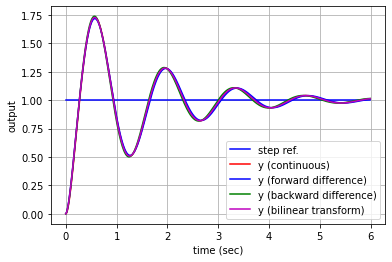

In [38]:
# Perform the simulation with some given parameters and time vector
kp = 200
ki = 240
kd = 25
T = 0.01
N = 20
tvec = np.arange(0,6, T)
_,_,_,_ = pid_compare(kp, ki, kd, N, T, tvec)

With $T = 0.01$ sec., the step responses from all 3 methods match well with the one from continuous-time PID.
When the sampling period is increased to T = 0.05 and 0.08 sec, approximation errors are more noticeable. 
As observed from the results, among the 
3 methods, the bilinear transformation performs best. 

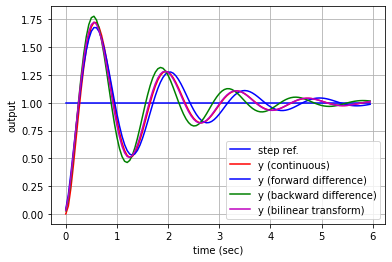

In [39]:
T = 0.05
tvec = np.arange(0,6, T)
_,_,_,_ = pid_compare(kp, ki, kd, N, T, tvec)

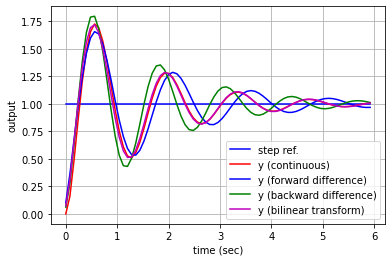

In [40]:
T = 0.08
tvec = np.arange(0,6, T)
_,_,_,_ = pid_compare(kp, ki, kd, N, T, tvec)

There is still one important issue regarding the forward difference method. Perform the simulation again with T = 0.05. Controller parameters remain the same,
except only the filter coefficient N is changed from 20 to 50. 

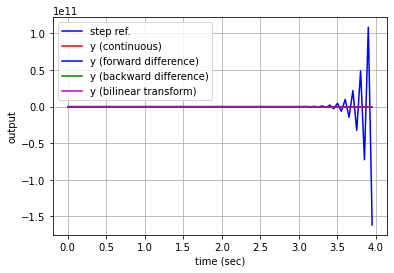

In [45]:
T = 0.05
tvec = np.arange(0,4, T)
N = 50
y,y_fd,y_bd,y_bt = pid_compare(kp, ki, kd, N, T, tvec)

In [52]:
print(" y (continuous-time) = {}\n y (forward diff.)= {}\n y (backward diff) = {}\n y (bilinear t.f) = {}"
      .format(y[79],y_fd[79],y_bd[79],y_bt[79]))

 y (continuous-time) = 0.972792603027794
 y (forward diff.)= -161763723763.7304
 y (backward diff) = 0.9359998926238712
 y (bilinear t.f) = 0.9693209730532245


The response from discrete controller converted by forward
difference is the only one that goes unstable. What has happened?

Take a closer look at the controller itself. Create the continuous-time PID
controller (18) and compute the poles to verify that it is a stable transfer function, 
except the pole at origin from the integrator term.

[-50.   0.]


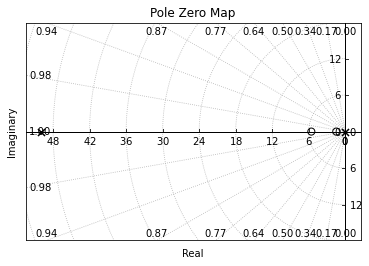

In [58]:
s = ctl.tf('s')
C_c = kp + ki/s + s*N*kd/(s+N)
print(ctl.pole(C_c))
_,_ =ctl.pzmap(C_c, grid=True)

Now check the pole location of the controller discretized using forward difference method

[-1.5  1. ]


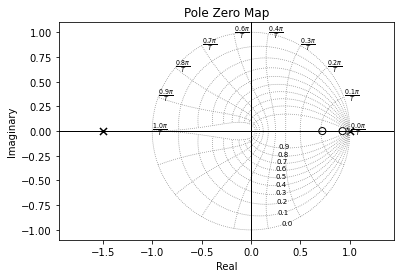

In [60]:
z = ctl.tf('z')
C_fd = kp + ki*T/(z-1) + kd*N*(z-1)/(z-1+N*T)
print(ctl.pole(C_fd))
_,_ = ctl.pzmap(C_fd, grid=True)

to see that this discrete controller is unstable, since it has a pole that lies outside unit circle.

So, this example shows that a stable continuous-time controller is
converted to an unstable discrete-time counterpart by the forward difference method, resulting in
the unbounded output in the step response simulation.

Stability is considered the most important property for a feedback system. Not
only an unstable system is rendered useless, it could also be harzardous. So it is
helpful to analyze how stability region is mapped between two domains. We
elaborate on this for the forward difference method.

The stability criteria in continuous-time domain is $Re(s) < 0$ . With forward
difference method, this translates to

$$
Re(s) = Re \Big(\frac{z-1}{T}\Big) \lt 0
$$
<div align="right">(30)</div>

Since the sampling period $T$ is always positive, so $Re(z-1) \lt 0$ . Let $z = \sigma + j\omega$,
we have

$$
Re(z-1) = Re(\sigma + j\omega -1) = \sigma - 1 \lt 0 \Rightarrow \sigma \lt 1
$$
<div align="right">(31)</div>

From this result, we conclude that, using forward difference conversion method, the
stability region in continuous-time domain is mapped to the area to the left of 1 in
the Z plane. This explains the possibility that stable continuous-time transfer
functions can be approximated by unstable discrete transfer functions.

It is left to the reader to verify that the left half plane of S plane is mapped by each
of the 3 conversion methods to the Z plane as shown in Figure 9. From this diagram,
it is obvious that bilinear transformation is the best choice in terms of stability
preservation, according to the fact that stability region in the Z plane is inside the
unit circle. In the backward difference case, some unstable continuous-time systems
may be mapped to stable discrete-time systems. This seems to pose less problem, in
the general sense that analysis and design is often done in continuous-time domain
and the resulting controller is converted to discrete-time at implementation phase.

<p align="center">
<img src="https://drive.google.com//uc?id=1-cM41fuIQvi5OYQRNHFlP6SujndH-ukC" width=600 alt="Figure 4"/>
</p>
<div align="center"><b>Figure 4 Stability region mapping of the 3 conversion methods</b></div>

Nevertheless, it can be concluded from this study that bilinear transformation is a
preferred choice in most cases. In certain applications such as filter design, a
technique called frequency prewarping can be added to yield precise match at a
particular frequency.

<div align="right">Last update : Jan 31, 2021</div>

<p align="center">
<img src="https://drive.google.com/thumbnail?id=13bzT7Rmy3bzvE7TiS0yfQo94kpxMuipF" alt="dewninja"/>
</p>
<div align="center">dew.ninja<br>Copyright 2021</div>